<a href="https://colab.research.google.com/github/syifaniads/KAL-CODE/blob/main/LIVE_4_NAMA_NIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Live Coding BAB 4 Pemrosesan Awal**

- Nama    : SYIFANI ADILLAH SALSABILA
- NIM     : 235150207111052
- Kelas   : KAL TIF-E

## **1. Import Library**

**Import library standar yang diperlukan, seperti pandas, numpy, dan sebagainya**

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

## **2. Load Dataset**

**a. Load dataset yang sudah diberikan, dibebaskan menggunakan metode apapun untuk loading dataset. Lalu jadikan dataframe.**

In [2]:
from google.colab import files
kontak = files.upload()

for fn in kontak.keys():
  print(f'Nama file "{fn}" dengan panjang {len(kontak[fn])} bytes')

Saving spaceship_train.csv to spaceship_train.csv
Nama file "spaceship_train.csv" dengan panjang 805421 bytes


**Tentang Dataset**

The dataset is Spaceship Titanic, a dataset for classification/prediction of whether a passenger was rescued (Transported=True) or not (Transported=False). This dataset is inspired by the Titanic concept but set in outer space. It consists of several columns/features:

*   PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
*   HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
*   CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
*   Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
*   Destination - The planet the passenger will be debarking to.
*   Age - The age of the passenger.
*   VIP - Whether the passenger has paid for special VIP service during the voyage.
*   RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
*   Name - The first and last names of the passenger.
*   Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

**b. *Cetak* dataset**

In [13]:
spaceship_df = pd.read_csv('/content/spaceship_train.csv')

In [15]:
print (spaceship_df.head(5))
print (spaceship_df.shape)
print (spaceship_df.describe())

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  
(8

**c. Hapus kolom PassengerId, Cabin, dan Name**

In [17]:
spaceship_df.drop(columns=["PassengerId", "Cabin", "Name"], inplace=True)

In [18]:
print(spaceship_df.head(5))

  HomePlanet CryoSleep  Destination   Age    VIP  RoomService  FoodCourt  \
0     Europa     False  TRAPPIST-1e  39.0  False          0.0        0.0   
1      Earth     False  TRAPPIST-1e  24.0  False        109.0        9.0   
2     Europa     False  TRAPPIST-1e  58.0   True         43.0     3576.0   
3     Europa     False  TRAPPIST-1e  33.0  False          0.0     1283.0   
4      Earth     False  TRAPPIST-1e  16.0  False        303.0       70.0   

   ShoppingMall     Spa  VRDeck  Transported  
0           0.0     0.0     0.0        False  
1          25.0   549.0    44.0         True  
2           0.0  6715.0    49.0        False  
3         371.0  3329.0   193.0        False  
4         151.0   565.0     2.0         True  


## **3. Cek Representasi Data**

**a. Cek tipe data**

In [20]:
spaceship_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(4)
memory usage: 687.8+ KB


***Pertanyaan***

Berdasarkan hasil di atas, setiap fitur/kolom memiliki tipe data yang berbeda-beda. Fitur dapat dikelompokan menjadi 2 jenis, yaitu fitur numerikal dan kategorikal. Jelaskan secara singkat perbedaan antara kedua jenis fitur !

Jawaban:
Fitur numerik pasti berisi angka dan dihitung matematis misal rata-rata, median, standar deviasi yang biasanya tipe float64 atau int64 yang dalam dataset ini berupa Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck. Sedangkan fitur kategorikal berisi label dengan tipe object atau bool dengan contoh di dataset ini ialah HomePlanet, CryoSleep, Destination, VIP, dan Transported.

**b. Ambil indeks fitur numerik dan kategorikal data**

In [22]:
fitur_numerik = spaceship_df.select_dtypes(include=['number']).columns
print("Fitur Numerik:", fitur_numerik)
fitur_kategorikal = spaceship_df.select_dtypes(include=['object']).columns
print("Fitur Kategorikal:", fitur_kategorikal)

Fitur Numerik: Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')
Fitur Kategorikal: Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP'], dtype='object')


**c. Transformasi nilai 0 ke NaN untuk data numerik**

In [25]:
spaceship_df = spaceship_df.replace(0.0, np.NaN)

## **4. Missing Value dan Imputasi**

**a. Cek Missing Value**

In [26]:
print(spaceship_df.isnull().sum())

HomePlanet       201
CryoSleep       5656
Destination      182
Age              357
VIP             8494
RoomService     5758
FoodCourt       5639
ShoppingMall    5795
Spa             5507
VRDeck          5683
Transported        0
dtype: int64


**b. Imputasi Data**

Lakukan imputasi data, dengan ketentuan untuk fitur numerik, data NaN diubah menggunakan fungsi **mean** serta untuk fitur kategorikal, data NaN diubah menggunakan fungsi **modus/mode**

In [29]:
def imputasi(df_input):
    class_column = df_input.columns[-1]
    for col in fitur_kategorikal:
      df_input[col] = df_input[col].fillna(df_input[col].mode()[0])

    for col in fitur_numerik:
        df_input[col] = df_input[col].fillna(df_input[col].mean())

    return df_input

In [31]:
# Apply imputasi
spaceship_df = imputasi(spaceship_df)

<ipython-input-29-3729d95a7014>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_input[col] = df_input[col].fillna(df_input[col].mode()[0])


**c. Cek Missing Value Setelah Imputasi**

In [32]:
print(spaceship_df.isnull().sum())

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64


## **5. Penanganan Outlier**

**Penanganan outlier hanya dilakukan pada fitur Numerik.**

**a. Cek Outlier**

Cek outlier dengan visualisasi boxplot.

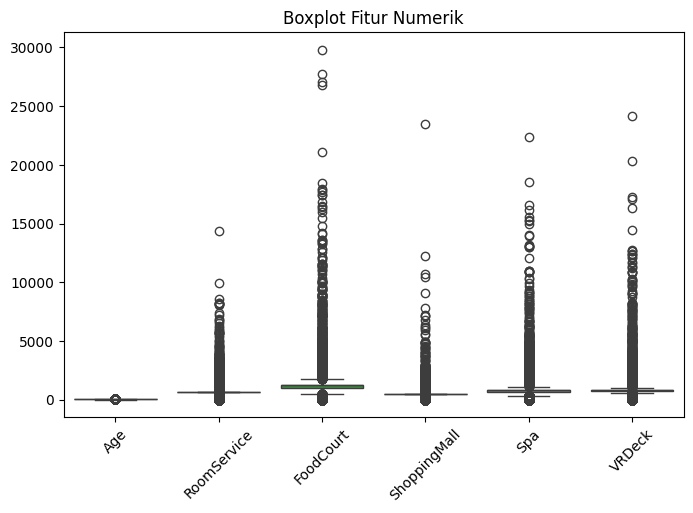

In [36]:
# Jika 'data_imputasi' adalah hasil dari fungsi imputasi, pastikan telah didefinisikan
data_imputasi = imputasi(spaceship_df)  # Pastikan df sudah ada sebelumnya
import seaborn as sns
import matplotlib.pyplot as plt
numerical_features = data_imputasi.select_dtypes(include=['number'])

plt.figure(figsize=(8, 5))  # Sedikit perbesar ukuran
sns.boxplot(data=numerical_features)

plt.xticks(rotation=45)  # Memiringkan label sumbu x agar lebih terbaca
plt.title("Boxplot Fitur Numerik")
plt.show()


**b. Outlier Handling**

Lakukan outlier handling dengan cara mengubah nilai outlier menjadi mean fitur/kolom. Suatu data dikatakan outlier jika nilainya berada di luar batas bawah (lower_bound) atau batas atas (upper_bound).

In [41]:
def handle_outliers(df):
    for column in numerical_features:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR   # Batas bawah, gunakan rumus di modul
        upper_bound = Q3 + 1.5 * IQR   # Batas atas, gunakan rumus di modul

        # Ganti nilai outlier dengan mean dari kolom
        mean_value = spaceship_df[column].mean()
        spaceship_df[column] = np.where((spaceship_df[column] < lower_bound) | (spaceship_df[column] > upper_bound), mean_value, spaceship_df[column]) # Gunakan properti np.where

    return df
    spaceship_df = handle_outliers(spaceship_df)

**c. Cek Hasil penanganan**

Cek hasil penanganan outlier dengan membandingkan boxplot data yang telah diatasi dengan boxplot sebelumnya

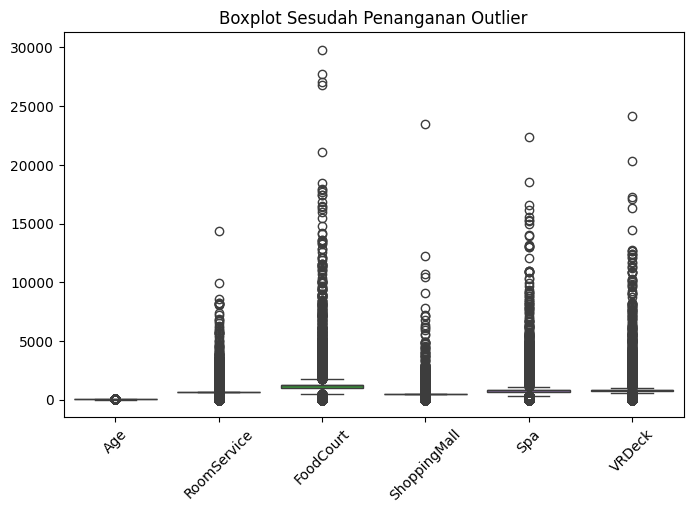

In [42]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=spaceship_df[fitur_numerik])
plt.xticks(rotation=45)
plt.title("Boxplot Sesudah Penanganan Outlier")
plt.show()

## **6. Normalisasi Data**

**Lakukan normalisasi data fitur numerik**

**a. Cetak rentang masing-masing kolom**

In [45]:
def cetak_rentang(spaceship_df_input):
    print(spaceship_df_input[fitur_numerik].agg(["min", "max"]))

cetak_rentang(spaceship_df)

      Age  RoomService  FoodCourt  ShoppingMall      Spa   VRDeck
min   1.0          1.0        1.0           1.0      1.0      1.0
max  79.0      14327.0    29813.0       23492.0  22408.0  24133.0


In [46]:
# Apply cetak_rentang
cetak_rentang(spaceship_df)

      Age  RoomService  FoodCourt  ShoppingMall      Spa   VRDeck
min   1.0          1.0        1.0           1.0      1.0      1.0
max  79.0      14327.0    29813.0       23492.0  22408.0  24133.0


**b. Cek statistik sebelum normalisasi**

In [47]:
spaceship_df[fitur_numerik].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,29.443498,651.632368,1276.436477,508.658385,831.070621,861.392027
std,13.719561,584.220333,1474.856106,547.819629,1051.908810,1057.479629
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,20.000000,651.632368,967.000000,508.658385,639.000000,747.000000
50%,28.000000,651.632368,1276.436477,508.658385,831.070621,861.392027
75%,37.000000,651.632368,1276.436477,508.658385,831.070621,861.392027
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


**c. Normalisasi MinMax**

Buat fungsi normalisasi dengan metode minmax

In [49]:
def minmax(spaceship_df_input):
    # Pilih hanya kolom numerik untuk normalisasi
    list_fitur = spaceship_df_input.select_dtypes(include=['number']).columns

    for fitur in list_fitur:
        max_val = spaceship_df_input[fitur].max()
        min_val = spaceship_df_input[fitur].min()
        spaceship_df_input[fitur] = (spaceship_df_input[fitur] - min_val) / (max_val - min_val)

    return spaceship_df_input

In [50]:
# Apply fungsi normalisasi
data_normal = minmax(spaceship_df)

***Pertanyaan***

Cetak rentang dan statistik kolom setelah normalisasi, lalu bandingkan dengan saat sebelum dilakukan normalisasi. Apa perbedaannya dan jelaskan secara singkat!

In [52]:
print("Statistik sebelum normalisasi:")
print(spaceship_df.describe())

print("\nStatistik setelah normalisasi:")
print(data_normal.describe())

print("\nRentang setiap kolom numerik setelah normalisasi:")
print(data_normal.select_dtypes(include=['number']).agg([min, max]))

Statistik sebelum normalisasi:
               Age  RoomService    FoodCourt  ShoppingMall          Spa  \
count  8693.000000  8693.000000  8693.000000   8693.000000  8693.000000   
mean      0.364660     0.045416     0.042783      0.021611     0.037045   
std       0.175892     0.040780     0.049472      0.023320     0.046946   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.243590     0.045416     0.032403      0.021611     0.028473   
50%       0.346154     0.045416     0.042783      0.021611     0.037045   
75%       0.461538     0.045416     0.042783      0.021611     0.037045   
max       1.000000     1.000000     1.000000      1.000000     1.000000   

            VRDeck  
count  8693.000000  
mean      0.035654  
std       0.043821  
min       0.000000  
25%       0.030913  
50%       0.035654  
75%       0.035654  
max       1.000000  

Statistik setelah normalisasi:
               Age  RoomService    FoodCourt  ShoppingMall          Spa 

<ipython-input-52-5fe0425f2fb1>:8: FutureWarning: The provided callable <built-in function min> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  print(data_normal.select_dtypes(include=['number']).agg([min, max]))
<ipython-input-52-5fe0425f2fb1>:8: FutureWarning: The provided callable <built-in function max> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  print(data_normal.select_dtypes(include=['number']).agg([min, max]))


Jawaban: Setelah dilakukan normalisasi dengan metode Min-Max Scaling, semua fitur numerik pada dataset kini memiliki rentang 0 hingga 1. Sebelum normalisasi, setiap fitur memiliki skala yang berbeda-beda. Misalnya, kolom Age mungkin memiliki rentang nilai 0-80, sementara kolom RoomService bisa mencapai ribuan. Perbedaan skala ini dapat menyebabkan algoritma machine learning yang sensitif terhadap skala, seperti KNN dan SVM, menjadi kurang optimal dalam melakukan prediksi.

Dengan normalisasi Min-Max, nilai terkecil dari setiap fitur diubah menjadi 0, sedangkan nilai terbesar menjadi 1, tanpa mengubah pola distribusi datanya. Hal ini membuat semua fitur berada dalam skala yang sama, sehingga model machine learning dapat belajar secara lebih seimbang dan tidak bias terhadap fitur yang memiliki skala lebih besar. Secara keseluruhan, normalisasi ini membantu meningkatkan kinerja model dalam melakukan analisis dan prediksi pada dataset Spaceship Titanic.

## **7. Label Encoding**



**a. Lakukan label encoding untuk fitur/kolom kategorikal!**

In [53]:
def label_encoding(x):
  if 'Earth' in x:
    return 0
  elif 'Mars' in x:
    return 1
  elif 'Europa' in x:
    return 2
  else:
    return -1

  data_normal['HomePlanet'] = data_normal['HomePlanet'].apply(lambda x: label_encoding(x))

**b. Ubah kolom target, yang awalnya boolean menjadi integer**

In [54]:
def boolean_to_integer(x):
    if x == True:
        return 1
    elif x == False:
        return 0
    else:
        return -1

data_normal['Transported'] = data_normal['Transported'].apply(lambda x: boolean_to_integer(x))

***Pertanyaan***

Mengapa label encoding penting?

Jawaban: Label encoding sendiri merupakan teknik yang digunakan untuk mengubah data kategorikal menjadi bentuk numerik, sehingga dapat diproses oleh algoritma machine learning. Pada kode di atas, label encoding diterapkan pada kolom HomePlanet, di mana setiap nilai kategori (seperti Earth, Mars, Europa) dikonversi menjadi angka 0, 1, atau 2. Jika ada nilai yang tidak sesuai dengan kategori tersebut, maka akan diberikan nilai -1 sebagai penanda data yang tidak dikenal.

Selain itu, kolom Transported, yang awalnya berupa nilai boolean (True/False), dikonversi menjadi integer (1 untuk True dan 0 untuk False). Hal ini penting karena banyak algoritma machine learning tidak dapat bekerja langsung dengan tipe data boolean atau string, sehingga perlu dikonversi ke format numerik.

## **8. Cek Hasil Preprocessing**

Cetak dataframe hasil preprocessing

In [59]:
print("5 Data Pertama:")
print(spaceship_df.head(5))

5 Data Pertama:
  HomePlanet  CryoSleep  Destination       Age   VIP  RoomService  FoodCourt  \
0     Europa       True  TRAPPIST-1e  0.487179  True     0.045416   0.042783   
1      Earth       True  TRAPPIST-1e  0.294872  True     0.007539   0.000268   
2     Europa       True  TRAPPIST-1e  0.730769  True     0.002932   0.119918   
3     Europa       True  TRAPPIST-1e  0.410256  True     0.045416   0.043003   
4      Earth       True  TRAPPIST-1e  0.192308  True     0.021081   0.002315   

   ShoppingMall       Spa    VRDeck  Transported  
0      0.021611  0.037045  0.035654            0  
1      0.001022  0.024457  0.001782            1  
2      0.021611  0.299639  0.001989            0  
3      0.015751  0.148525  0.007956            0  
4      0.006385  0.025171  0.000041            1  


***Pertanyaan***

Menurutmu, hal apa lagi yang bisa dilakukan dalam pemrosesan awal data selain yang di atas, jika melihat karakteristik dataset?

Jawaban: Sebelum melakukan analisis atau membangun model machine learning, langkah awal yang penting dilakukan adalah pemrosesan awal data (data preprocessing). Salah satu tantangan utama dalam dataset adalah adanya missing values atau data yang hilang. Untuk mengatasinya, saya menghapus baris atau kolom yang memiliki terlalu banyak data hilang atau melakukan imputasi dengan menggantinya menggunakan nilai mean, median, atau modus tergantung pada jenis datanya. Jika fitur bersifat kategorikal, saya mengisi nilai yang hilang dengan kategori khusus seperti 'Unknown' agar tetap dapat digunakan dalam analisis.

Selain itu, jika dataset mengandung fitur kategorikal, maka perlu dilakukan transformasi ke bentuk numerik agar bisa diproses oleh model machine learning. Salah satu metode yang umum digunakan adalah One-Hot Encoding (OHE) untuk kategori yang tidak memiliki urutan tertentu, seperti jenis spesies. Sedangkan jika fitur bersifat ordinal (misalnya tingkat pendidikan: rendah, sedang, tinggi), maka lebih cocok menggunakan Label Encoding untuk mengonversinya menjadi angka yang merepresentasikan urutan.

Selanjutnya, untuk mendeteksi dan menangani outlier karena keberadaannya dapat mempengaruhi performa model, terutama pada algoritma berbasis regresi atau berbasis jarak seperti KNN. Salah satu cara mendeteksi outlier adalah dengan metode Interquartile Range (IQR) atau menggunakan Z-Score. Jika ditemukan outlier, menanganinya dengan menghapusnya, menggantinya dengan batas tertentu, atau menerapkan transformasi seperti logaritmik untuk mengurangi dampaknya.

Selain itu, perlu dilakukan feature scaling (skalasi fitur) agar nilai dari berbagai fitur berada dalam skala yang seragam. Metode Min-Max Scaling sering digunakan untuk model berbasis jarak seperti KNN dan K-Means, di mana data disesuaikan ke rentang 0 hingga 1. Sementara itu, Standarisasi (Z-Score Normalization) lebih cocok jika data berdistribusi normal karena akan mengubah data agar memiliki rata-rata 0 dan standar deviasi 1.
